<a href="https://colab.research.google.com/github/syedanida/end2end-modeling-with-Deep-Learning/blob/main/end2end_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
# Import necessary libraries
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [26]:
path = kagglehub.dataset_download("blastchar/telco-customer-churn")
print("Path to dataset files:", path)

data = pd.read_csv(path + "/WA_Fn-UseC_-Telco-Customer-Churn.csv")

Path to dataset files: /root/.cache/kagglehub/datasets/blastchar/telco-customer-churn/versions/1


In [27]:
# Check for missing values
print("Missing values in the dataset:")
print(data.isnull().sum())

Missing values in the dataset:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [28]:
# Handle missing values by filling with mode (for categorical columns) or median (for numerical columns)
data.fillna(data.mode().iloc[0], inplace=True)

In [29]:
# Convert 'TotalCharges' to numeric and handle errors (e.g., blank spaces or errors in the column)
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data.fillna(data['TotalCharges'].median(), inplace=True)

In [30]:
# Encode categorical columns: 'gender', 'Partner', 'Dependents', 'PhoneService', etc.
data = pd.get_dummies(data, drop_first=True)

In [31]:
# Feature Selection: Select features (excluding the target variable 'Churn')
X = data.drop(columns=['Churn_Yes'])
y = data['Churn_Yes']

In [32]:
# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
# Define a simple neural network architecture
model = Sequential([
    Dense(64, activation='relu', input_dim=X_train.shape[1]),  # Input layer with 64 neurons
    Dropout(0.2),  # Dropout for regularization
    Dense(32, activation='relu'),  # Hidden layer with 32 neurons
    Dropout(0.2),
    Dense(1, activation='sigmoid')  # Output layer with sigmoid activation (binary classification)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [34]:
# Use binary cross-entropy loss and Adam optimizer
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

In [35]:
# Early stopping to avoid overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

Epoch 1/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 9s 25ms/step - accuracy: 0.6689 - loss: 2.7920 - val_accuracy: 0.7779 - val_loss: 0.5137
Epoch 2/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.7438 - loss: 0.6085 - val_accuracy: 0.7835 - val_loss: 0.4650
Epoch 3/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.7541 - loss: 0.5481 - val_accuracy: 0.7850 - val_loss: 0.4533
Epoch 4/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.7709 - loss: 0.5229 - val_accuracy: 0.7828 - val_loss: 0.4856
Epoch 5/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - accuracy: 0.7725 - loss: 0.4986 - val_accuracy: 0.7857 - val_loss: 0.4680
Epoch 6/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - accuracy: 0.7883 - loss: 0.4660 - val_accuracy: 0.7828 - val_loss: 0.4645
Epoch 7/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.7714 - loss: 0.4900 - val_accuracy: 0.7814 - val_loss: 0.4570
Epoch 8/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.7803 - loss: 0.4794 - 

In [36]:
# 1. Accuracy, Precision, Recall, F1 Score per class and overall
y_pred = (model.predict(X_test) > 0.5).astype('int32')  # Convert probabilities to binary labels

print("\nClassification Report (Precision, Recall, F1 per class):")
print(classification_report(y_test, y_pred))

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step

Classification Report (Precision, Recall, F1 per class):
              precision    recall  f1-score   support

       False       0.81      0.95      0.87      1036
        True       0.73      0.39      0.51       373

    accuracy                           0.80      1409
   macro avg       0.77      0.67      0.69      1409
weighted avg       0.79      0.80      0.78      1409



45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


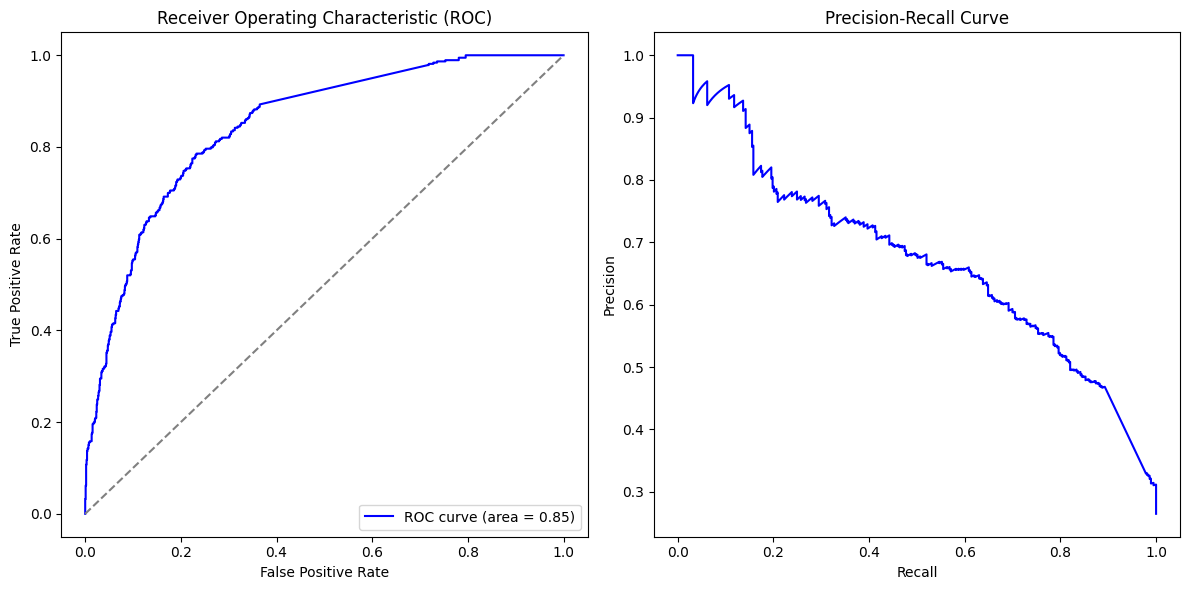

In [37]:
# 2. ROC and Precision-Recall Curves
# ROC curve
fpr, tpr, _ = roc_curve(y_test, model.predict(X_test))
roc_auc = auc(fpr, tpr)

# Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, model.predict(X_test))

# Plot ROC and PR curves
plt.figure(figsize=(12, 6))

# ROC Curve
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('Receiver Operating Characteristic (ROC)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')

# Precision-Recall Curve
plt.subplot(1, 2, 2)
plt.plot(recall, precision, color='blue')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')

plt.tight_layout()
plt.show()

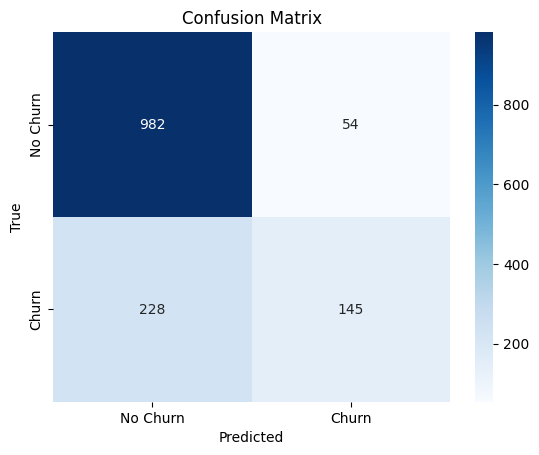

In [38]:
# 3. Per-Class Error Analysis
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [39]:
# Integration with Weights & Biases
import wandb
wandb.init(project="Telco Churn Prediction")

# Log model metrics to W&B
wandb.log({
    "accuracy": history.history['accuracy'][-1],
    "val_accuracy": history.history['val_accuracy'][-1],
    "roc_auc": roc_auc
})

In [40]:
# Log confusion matrix
wandb.log({"confusion_matrix": wandb.Image(cm)})

In [41]:
# End the W&B run
wandb.finish()

accuracy,▁█
roc_auc,▁█
val_accuracy,▁█
accuracy,0.80813
roc_auc,0.84697
val_accuracy,0.80483


In [42]:
# Model Summary and Architecture Diagram
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 64)                  │         452,672 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,364,357 (5.20 MB)

 Trainable params: 454,785 (1.73 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 909,572 (3.47 MB)